In [9]:
import pandas as pd
from shapely.geometry import Point, shape
import json
import geopandas as gpd
from shapely.ops import unary_union

In [12]:
edges_gdf = gpd.read_file("../processed/edges.geojson")

# park_area 불러오기
with open("polygon_data/park_area.geojson") as f:
    park_data = json.load(f)
park_polygon = unary_union([shape(feat["geometry"]) for feat in park_data["features"]])

# mountain_area 불러오기
with open("polygon_data/mountain_area.geojson") as f:
    mountain_data = json.load(f)
mountain_polygon = unary_union([shape(feat["geometry"]) for feat in mountain_data["features"]])

# river_area 불러오기
with open("polygon_data/river_area.geojson") as f:
    river_data = json.load(f)
river_polygon = unary_union([shape(feat["geometry"]) for feat in river_data["features"]])

Skipping field highway: unsupported OGR type: 5
Skipping field name: unsupported OGR type: 5


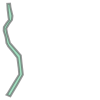

In [16]:
river_polygon

In [ ]:
# 영역 안에 포함된 노드 필터링
node_mask = nodes_gdf.apply(lambda r: polygon.contains(Point(r['lon'], r['lat'])), axis=1)
selected_nodes = nodes_gdf[node_mask]

In [17]:
edges_gdf

,u,v,key,length,geometry
0,287288045,1943131901,0,38.805000,"LINESTRING (127.02953 37.58266, 127.0292 37.58..."
1,287288045,1943131877,0,39.840708,"LINESTRING (127.02953 37.58266, 127.0296 37.5823)"
2,287288045,3964387739,0,24.542441,"LINESTRING (127.02953 37.58266, 127.0297 37.58..."
3,287710021,7068765358,0,4.968920,"LINESTRING (127.04522 37.57995, 127.0452 37.57..."
4,287710021,10017702402,0,65.032964,"LINESTRING (127.04522 37.57995, 127.04536 37.5..."
...,...,...,...,...,...
21593,13059159404,3831105905,0,50.734019,"LINESTRING (127.06654 37.59626, 127.06644 37.5..."
21594,13059159452,13059152169,0,15.224295,"LINESTRING (127.06623 37.59507, 127.06616 37.5..."
21595,13059159452,13059152166,0,11.836931,"LINESTRING (127.06623 37.59507, 127.06629 37.5..."
21596,13059159452,13059159453,0,8.671646,"LINESTRING (127.06623 37.59507, 127.06632 37.5..."
